In [1]:
! pip install -q -U langchain_core langgraph langchain-google-genai

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph,START,END,MessagesState
from langgraph.graph.state import CompiledStateGraph
from langgraph.prebuilt import ToolNode,tools_condition
from IPython.display import display,Image
from langchain_core.messages import HumanMessage

In [4]:
load_dotenv()

api_key = os.getenv("GEMINI_API_KEY")

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key=api_key)

#print(llm)

Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring


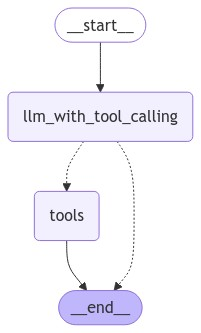

In [22]:
def multiply (a:int,b:int):
    """ Multiply two numbers
    Args:
    a:first int
    b:second int
    """
    return a*b

llm_with_tool = llm.bind_tools([multiply])

class MessagesState(MessagesState):
    pass

def llm_with_tool_calling(state:MessagesState)->MessagesState:
    return {"messages" : llm_with_tool.invoke(state["messages"])}

builder : StateGraph = StateGraph(MessagesState)

builder.add_node("llm_with_tool_calling",llm_with_tool_calling)
builder.add_node("tools",ToolNode([multiply]))

builder.add_edge(START,"llm_with_tool_calling")
builder.add_conditional_edges("llm_with_tool_calling",tools_condition)
builder.add_edge("tools",END)

graph : CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 by 3")})

#print(messages)
for m in messages["messages"]:
    m.pretty_print()

{'name': 'multiply', 'description': 'Multiply two numbers\n   Args:\n   a:first int\n   b:second int', 'parameters': {'type_': 6, 'description': 'Multiply two numbers\nArgs:\na:first int\nb:second int', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

Multiply 2 by 3
================================== Ai Message ==================================
Tool Calls:
  multiply (5c5fd30a-2da7-47b2-a947-af9b22a06af3)
 Call ID: 5c5fd30a-2da7-47b2-a947-af9b22a06af3
  Args:
    a: 2.0
    b: 3.0
================================= Tool Message =